In [39]:
import numpy as np
import matplotlib.pyplot as plt

#higres plots
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


## import GPT2 model and extract its position embeding matrix

In [40]:
from transformers import GPT2Model
gpt2 = GPT2Model.from_pretrained('gpt2')
gpt2

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D(nf=2304, nx=768)
        (c_proj): Conv1D(nf=768, nx=768)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D(nf=3072, nx=768)
        (c_proj): Conv1D(nf=768, nx=3072)
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [41]:
#position embeddings
positions = gpt2.wpe.weight.detach().numpy()

In [42]:
positions.shape

(1024, 768)

In [43]:
positions.T.shape

(768, 1024)

In [44]:
positions

array([[-1.8820720e-02, -1.9741860e-01,  4.0267250e-03, ...,
        -4.3043736e-02,  2.8267192e-02,  5.4490108e-02],
       [ 2.3959434e-02, -5.3792033e-02, -9.4878644e-02, ...,
         3.4170013e-02,  1.0171850e-02, -1.5572949e-04],
       [ 4.2160717e-03, -8.4763914e-02,  5.4514930e-02, ...,
         1.9744711e-02,  1.9324856e-02, -2.1423856e-02],
       ...,
       [-1.7986511e-03,  1.6052092e-03, -5.5103153e-02, ...,
         1.3616630e-02, -7.1805264e-03,  3.7552188e-03],
       [ 3.2105497e-03,  1.5500595e-03, -4.8944373e-02, ...,
         2.0725457e-02, -1.1837787e-02, -5.5682898e-04],
       [ 2.6609693e-04,  3.0272407e-03, -1.7086461e-03, ...,
        -4.6505518e-03, -2.3541194e-03, -5.7855090e-03]], dtype=float32)

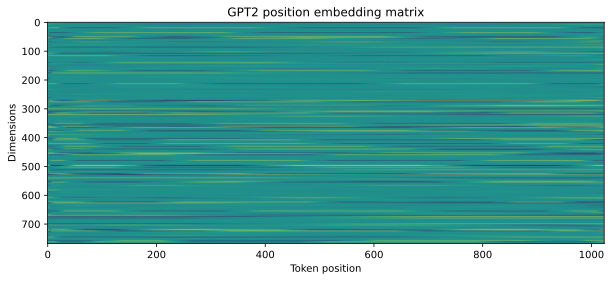

In [89]:
# visualize the matrix
plt.figure(figsize=(10,4))
plt.imshow(positions.T,aspect='auto',vmin=-.2,vmax=.2)
plt.gca().set(xlabel='Token position',ylabel='Dimensions',title='GPT2 position embedding matrix')
plt.show()

In [46]:
# the vectors below are some randomly selected rows
# from above matrix (GPT2 position embedding matirx

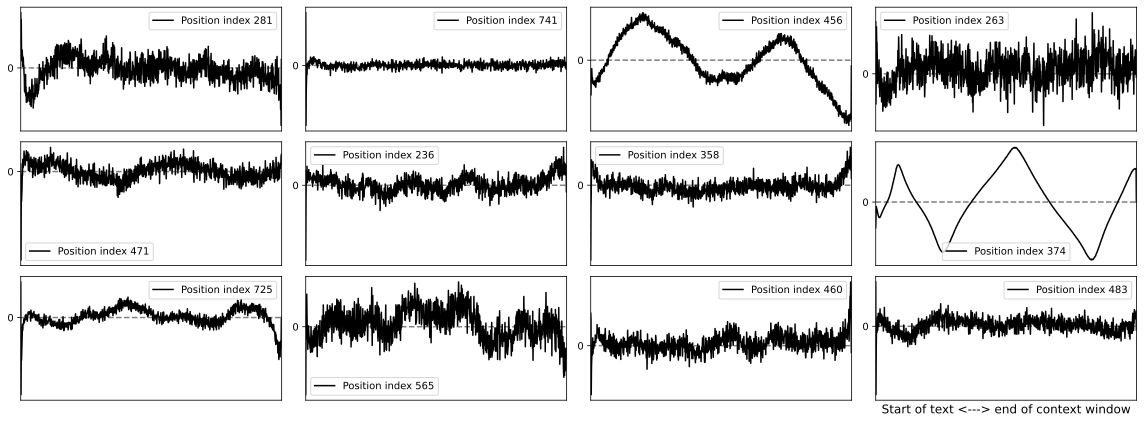

In [47]:
#Visualize some posiiton vectors

_,axs = plt.subplots(3,4, figsize=(16,6))

#pick random vectors
for a in axs.flatten():
    # a random position embedding vector
    randidx = np.random.randint(positions.shape[1])

    #and plot it 
    a.plot(positions[:,randidx],'k',label=f'Position index {randidx}')
    a.axhline(0,linestyle='--',color='gray',zorder=-3)

    a.set(xticks=[],yticks=[0],xlim=[0,positions.shape[0]])
    a.legend(fontsize=10)


#x axis label on  one plot
a.set_xlabel('Start of text <---> end of context window', fontsize=12)
plt.tight_layout()
plt.show()
    

In [48]:
positions

array([[-1.8820720e-02, -1.9741860e-01,  4.0267250e-03, ...,
        -4.3043736e-02,  2.8267192e-02,  5.4490108e-02],
       [ 2.3959434e-02, -5.3792033e-02, -9.4878644e-02, ...,
         3.4170013e-02,  1.0171850e-02, -1.5572949e-04],
       [ 4.2160717e-03, -8.4763914e-02,  5.4514930e-02, ...,
         1.9744711e-02,  1.9324856e-02, -2.1423856e-02],
       ...,
       [-1.7986511e-03,  1.6052092e-03, -5.5103153e-02, ...,
         1.3616630e-02, -7.1805264e-03,  3.7552188e-03],
       [ 3.2105497e-03,  1.5500595e-03, -4.8944373e-02, ...,
         2.0725457e-02, -1.1837787e-02, -5.5682898e-04],
       [ 2.6609693e-04,  3.0272407e-03, -1.7086461e-03, ...,
        -4.6505518e-03, -2.3541194e-03, -5.7855090e-03]], dtype=float32)

In [49]:
positions[:,2]#.shape

array([ 0.00402672, -0.09487864,  0.05451493, ..., -0.05510315,
       -0.04894437, -0.00170865], dtype=float32)

## Similarities across vectors

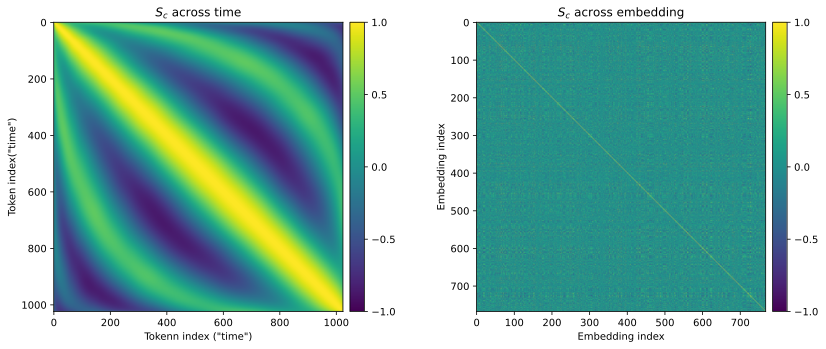

In [60]:
# Cosine sim for "time series" (Token index)
Pnorm1 = positions/np.linalg.norm(positions,axis=1,keepdims=True) #axis1 is imp (across rows, ie. each tokens)
cossim_tokens = Pnorm1@Pnorm1.T

# cosine sim across embedding dimensions
Pnorm0 = positions/np.linalg.norm(positions, axis=0, keepdims=True)
# axis 0 across columns, i.e find norm across each dimension
cossim_embeds = Pnorm0.T@Pnorm0

#draw images
fig,axs = plt.subplots(1,2,figsize=(12,5))

h=axs[0].imshow(cossim_tokens,vmin=-1,vmax=1)
axs[0].set(xlabel='Tokenn index ("time")', ylabel='Token index("time")',title='$S_c$ across time')
ch=fig.colorbar(h,ax=axs[0],pad=.02,fraction=.046)
ch.ax.tick_params(labelsize=10)
ch.ax.set_yticks(np.arange(-1,1.1,.5))

h=axs[1].imshow(cossim_embeds,vmin=-1,vmax=1)
axs[1].set(xlabel='Embedding index', ylabel='Embedding index',title='$S_c$ across embedding')
ch=fig.colorbar(h,ax=axs[1],pad=.02,fraction=.046)
ch.ax.tick_params(labelsize=10)
ch.ax.set_yticks(np.arange(-1,1.1,.5))

plt.tight_layout()
plt.show()

In [58]:
# How to read the above 2 graphs???

# on the right side, each of the value is the cosine 
# similarity of each of the embedding vectors
# For eg: cosine sim b/w dim 369 (its vector lenght is 1024) 
# and dim 415 (its vector length is 1024


#on the first image on left,
# it is the cosine similariy b/w successive time points (tokens) across all position vectors
# neighbouring tokens would have strong correlation hence the yellow color 
# near the diagonal in the left graph
# blue means as you go further away, correlations tend to be -ve


In [61]:
# the above positional embedding was "trained" from data
# there is also another method which is "predefined"

## Predefined position embeddings

In [67]:
# here we use sine and cosine waves to define position embeddings


# sinusoidal embeddings as defined in "attention" paper
positionsFormula = np.zeros_like(gpt2.wpe.weight.data)
d = positionsFormula.shape[1]

# token position ("time")
th = np.arange(positionsFormula.shape[0])

# create the vectors
for i in range(0, positionsFormula.shape[1],2):

    # denominator scaling factor
    denom = 10000 ** (2*i//2 / d)

    # define the embeddings
    positionsFormula[:,i] = np.sin(th / denom)
    positionsFormula[:,i+1] = np.cos(th / denom)

In [64]:
positionsFormula.shape

(1024, 768)

In [68]:
d

768

In [69]:
th

array([   0,    1,    2, ..., 1021, 1022, 1023])

## MORE EXPLORATIONS

In [76]:
# small demo about triu
# triu gives you the upper triangle of a matrix 
A = np.random.randint(0,9,(4,4))
print(A)
# the second arg in .triu() makes the diagonal as 0
# in cosine similarity we want to exlcude the diagonals as it is 1
# now if we take non zero entries of this upper tri matrix, we 
# get the unique cosine similarities
print(A[np.nonzero(np.triu(A,1))])

[[7 8 8 0]
 [1 7 6 2]
 [8 7 8 7]
 [3 2 0 3]]
[8 8 6 2 7]


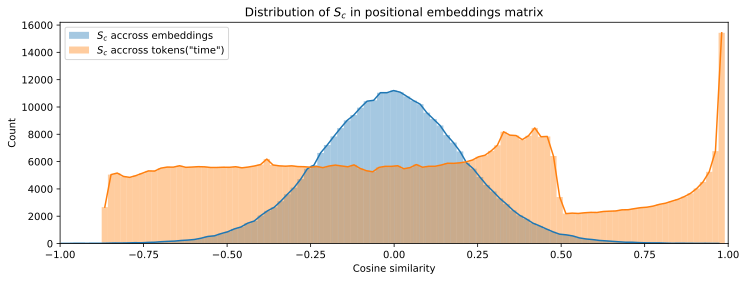

In [81]:
# get the unique cosine similarity values from upper traingle
unique_cs_embeds = cossim_embeds[np.nonzero(np.triu(cossim_embeds,1))]
unique_cs_tokens = cossim_tokens[np.nonzero(np.triu(cossim_tokens,1))]

# get thjeir distributions
embed_hy, embed_hx = np.histogram(unique_cs_embeds,100)
token_hy, token_hx = np.histogram(unique_cs_tokens,100)

#visualize
plt.figure(figsize=(12,4))
plt.bar(embed_hx[:-1], embed_hy,width=np.diff(embed_hx[:2]),alpha=.4,label='$S_c$ accross embeddings')
plt.bar(token_hx[:-1], token_hy,width=np.diff(token_hx[:2]),alpha=.4,label='$S_c$ accross tokens("time")')
plt.plot(embed_hx[:-1],embed_hy)
plt.plot(token_hx[:-1],token_hy)

plt.legend()
plt.gca().set(xlim=[-1,1],xlabel = 'Cosine similarity', ylabel='Count',title ='Distribution of $S_c$ in positional embeddings matrix')
plt.show()

In [ ]:
# From above graph:
  # most of the position vectors are orthogonal to each other (blue line)[Sc across embeddings)
  # 

## Now perform the same anyalysis with a shuffled Sc distribution


In [87]:
# Shuffle the embeddings elements
# create a shuffled cosine sim disbn

randomEmbeds = positions.flatten()
#randomly shuffle them
np.random.shuffle(randomEmbeds)

#reshape bvack to matrrix
randomEmbeds = randomEmbeds.reshape(positions.shape)

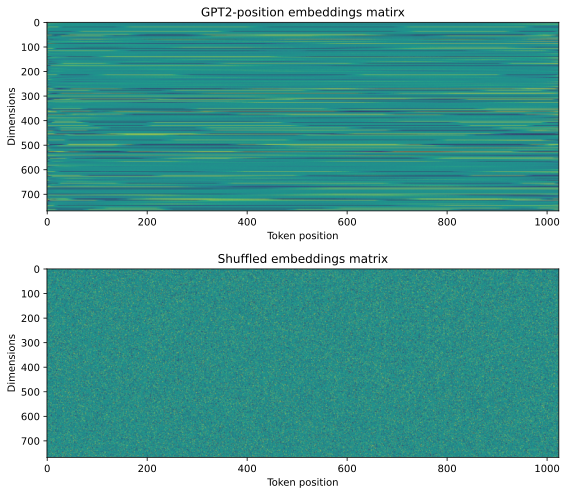

In [93]:
_,axs = plt.subplots(2,1,figsize=(8,7))

axs[0].imshow(positions.T, aspect='auto', vmin=-.1, vmax=.1)
axs[0].set(xlabel='Token position', ylabel='Dimensions',title='GPT2-position embeddings matirx')

axs[1].imshow(randomEmbeds.T, aspect='auto', vmin=-.1, vmax=.1)
axs[1].set(xlabel='Token position', ylabel='Dimensions',title='Shuffled embeddings matrix')

plt.tight_layout()
plt.show()



In [95]:
# calculate cosine sim
Rnorm0 = randomEmbeds/np.linalg.norm(randomEmbeds,axis=0,keepdims=True)
cossim_random = Rnorm0.T@Rnorm0

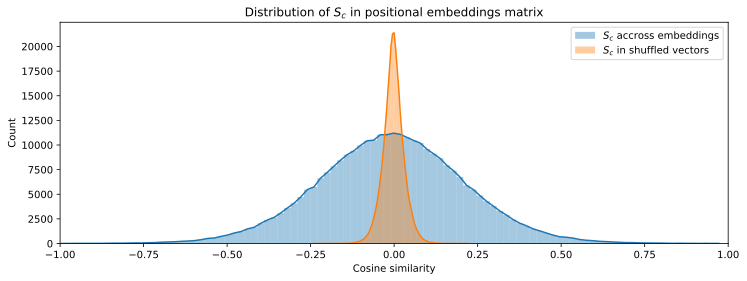

In [98]:
# get the unique cosine similarity values from upper traingle
unique_cs_random = cossim_random[np.nonzero(np.triu(cossim_random,1))]

# get thjeir distributions
random_hy, random_hx = np.histogram(unique_cs_random,100)


#visualize
plt.figure(figsize=(12,4))
plt.bar(embed_hx[:-1], embed_hy,width=np.diff(embed_hx[:2]),alpha=.4,label='$S_c$ accross embeddings')
plt.bar(random_hx[:-1], random_hy,width=np.diff(random_hx[:2]),alpha=.4,label='$S_c$ in shuffled vectors')
plt.plot(embed_hx[:-1],embed_hy)
plt.plot(random_hx[:-1],random_hy)

plt.legend()
plt.gca().set(xlim=[-1,1],xlabel = 'Cosine similarity', ylabel='Count',title ='Distribution of $S_c$ in positional embeddings matrix')
plt.show()